In [4]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
comp_fail = pd.read_csv("train_data.csv",index_col=0)

In [5]:
print(comp_fail.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, jobID1634295 to jobID1165709
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   memory_GB            20000 non-null  float64
 1   network_log10_MBps   20000 non-null  float64
 2   local_IO_log10_MBps  20000 non-null  float64
 3   NFS_IO_log10_MBps    20000 non-null  float64
 4   failed               20000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 937.5+ KB
None


In [ ]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

In [86]:
comp_fail.columns

Index(['memory_GB', 'network_log10_MBps', 'local_IO_log10_MBps',
       'NFS_IO_log10_MBps', 'failed'],
      dtype='object')

In [93]:
cat_cols = [col for col in comp_fail.columns if comp_fail[col].dtypes == 'O']

for col in comp_fail:
    print(comp_fail[col].value_counts(), "\n\n")

4.9981     5
5.0095     4
5.0535     4
9.8129     4
7.4236     4
          ..
25.8651    1
16.4559    1
29.0406    1
29.7149    1
21.4721    1
Name: memory_GB, Length: 18620, dtype: int64 


 2.8821    29
 3.2080    25
 3.2343    13
 2.8823    12
 3.2345    12
           ..
 3.1117     1
 1.9422     1
 0.5732     1
 1.1902     1
-1.4519     1
Name: network_log10_MBps, Length: 16402, dtype: int64 


-0.7196    6
-0.6231    6
-0.6070    6
 0.1870    6
-0.6857    6
          ..
 0.9775    1
 0.2174    1
-0.9128    1
-0.3553    1
-0.4670    1
Name: local_IO_log10_MBps, Length: 13774, dtype: int64 


-3.0000    10101
-2.9175       74
-2.9210       52
-2.9138       50
-2.9097       46
           ...  
 0.0284        1
 1.6651        1
-0.6852        1
 0.4415        1
-0.4670        1
Name: NFS_IO_log10_MBps, Length: 8114, dtype: int64 


0    18374
1     1626
Name: failed, dtype: int64 




In [96]:
comp_fail.isna().sum()

memory_GB              0
network_log10_MBps     0
local_IO_log10_MBps    0
NFS_IO_log10_MBps      0
failed                 0
dtype: int64

In [26]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = ["Working"],
            y = comp_fail[comp_fail["failed"]== 0]["failed"].value_counts().values,
            name='Working'
    )

trace1 = go.Bar(
            x = ["Failed"],
            y = comp_fail[comp_fail["failed"]== 1]["failed"].value_counts().values,
            name='Failed'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Failure Variable'
    ),
    title='Failure Distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [57]:
#Percentage of Failure
non_fail_count =int(comp_fail[comp_fail["failed"]== 0]["failed"].value_counts())
fail_count = int(comp_fail[comp_fail["failed"]== 1]["failed"].value_counts())
print((fail_count/(non_fail_count+fail_count)*100),"%")
print((non_fail_count/(non_fail_count+fail_count)*100),"%")

8.129999999999999 %
91.86999999999999 %


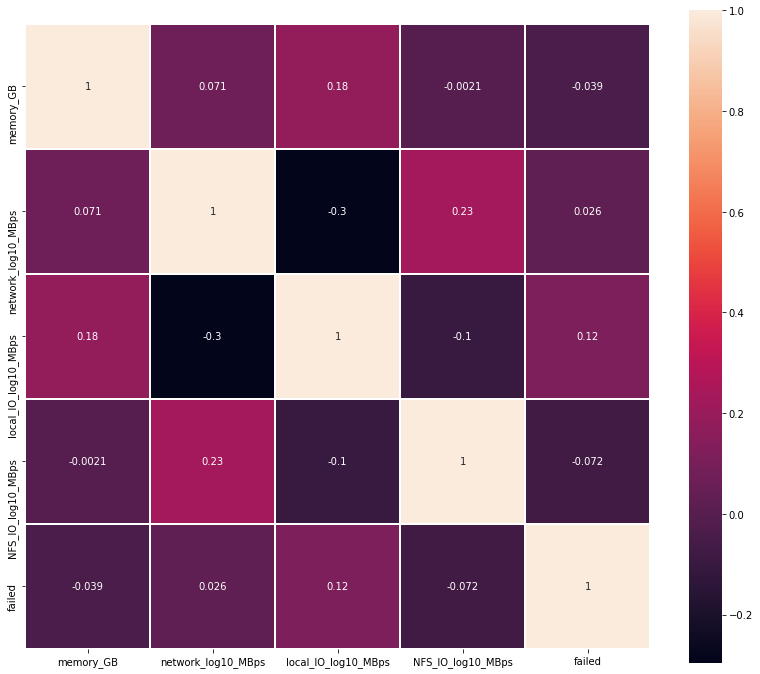

In [58]:
plt.figure(figsize=(14,12))
sns.heatmap(comp_fail.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [61]:
#Creating the X and y variables
X = comp_fail.drop('failed', 1).values
y = comp_fail["failed"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

LR: 0.917867 (0.004740)
LDA: 0.917867 (0.004740)
KNN: 0.939067 (0.007585)
CART: 0.909600 (0.008322)
NB: 0.917867 (0.004740)
RF: 0.943267 (0.005692)
SVM: 0.938600 (0.005660)
XGB: 0.940533 (0.005608)


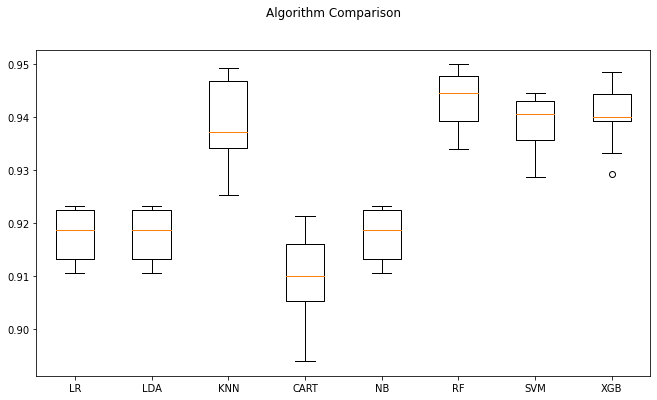

In [116]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))

# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring="balanced_accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [107]:
cv_results = cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold,scoring="balanced_accuracy")

In [108]:
cv_results

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [99]:
logisticb = LogisticRegression()
logisticb.fit(X_train,y_train)

logisticb.score(X_train,y_train)

0.9178666666666667

In [ ]:
logisticb.